## .1 Opening the file

In [12]:
# QUESTION 1
import pandas as pd
data = "C:\\Users\\sowky\\Downloads\\legal_text_classification.csv"
df = pd.read_csv(data)
df.head(20)

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...
5,Case6,cited,GEC Marconi Systems Pty Ltd v BHP Information ...,I accept that the making of a rolled up offer ...
6,Case7,cited,John S Hayes &amp; Associates Pty Ltd v Kimber...,The preceding general principles inform the ex...
7,Case8,cited,Seven Network Limited v News Limited (2007) 24...,On the question of the level of unreasonablene...
8,Case9,applied,Australian Broadcasting Corporation v O'Neill ...,recent decision of the High Court in Australia...
9,Case10,followed,Hexal Australia Pty Ltd v Roche Therapeutics I...,Hexal Australia Pty Ltd v Roche Therapeutics I...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id       24985 non-null  object
 1   case_outcome  24985 non-null  object
 2   case_title    24985 non-null  object
 3   case_text     24809 non-null  object
dtypes: object(4)
memory usage: 780.9+ KB


## Removing stopwords

In [14]:
#import regex
import regex as re
#define tokenize
def tokenize(case_text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r':', '', text) # Remove :
    text = re.findall(r'[\w]*[a-z|A-Z][\w-]*', case_text)


In [15]:
#REMOVE STOP WORDS
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

{"needn't", 'yours', 'yourself', 'them', "she's", 'your', 'below', 'off', 'didn', 'mightn', "hasn't", "it's", 'same', 'an', "mightn't", 'over', 'not', 'shan', 'such', 'before', "haven't", "should've", 'other', 'herself', 'hers', 'wouldn', 'with', 'couldn', 'themselves', 'when', 'ours', "weren't", 'her', 'needn', 'these', 'if', 'out', 'am', 'further', 'whom', 'we', 'where', 't', 'yourselves', 'after', 'his', "wouldn't", "couldn't", 'having', "you're", 'ourselves', 'my', 'himself', 'most', 'through', "didn't", 'does', 'itself', 'again', 'can', 'then', 'so', 'doesn', "mustn't", 'its', "you'll", 'who', 'myself', 'of', 'all', 'no', 'haven', 'hasn', 'very', 'both', 'for', 'because', 'or', 'from', 'what', "won't", 'down', 'ma', 'into', 'own', 'll', 've', 'as', 'are', "hadn't", 'mustn', 'in', 'but', 'you', 'will', 'did', 'him', "you've", 's', 'ain', "aren't", 'between', 'theirs', 'were', 'now', 'being', 'isn', 'y', 'nor', 'i', 're', 'has', "wasn't", 'won', 'during', 'wasn', 'me', 'it', 'to', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowky\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
tokenize = df['case_text']

tokenize


0        Ordinarily that discretion will be exercised s...
1        The general principles governing the exercise ...
2        Ordinarily that discretion will be exercised s...
3        The general principles governing the exercise ...
4        The preceding general principles inform the ex...
                               ...                        
24980    That is not confined to persons who control th...
24981    Once the threshold prescribed by s 1335 is sat...
24982    Once the threshold prescribed by s 1335 is sat...
24983    Given the extent to which Deumer stands to gai...
24984    In my view, it is clear that the Court may do ...
Name: case_text, Length: 24985, dtype: object

## 2.Operations

In [93]:
# QUESTION 2
df['length'] = df['case_text'].str.len()
df.describe()

,length,num_tokens,Subjectivity,Polarity
count,24809.000000,24985.000000,24985.000000,24985.000000
mean,2650.940385,7.998319,0.037707,0.002677
std,6768.945893,2.615870,0.120479,0.065612
min,95.000000,1.000000,0.000000,-0.800000
25%,841.000000,6.000000,0.000000,0.000000
50%,1408.000000,8.000000,0.000000,0.000000
75%,2533.000000,10.000000,0.000000,0.000000
max,133561.000000,31.000000,1.000000,1.000000


In [18]:
df.dtypes

case_id          object
case_outcome     object
case_title       object
case_text        object
length          float64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   case_id       24985 non-null  object 
 1   case_outcome  24985 non-null  object 
 2   case_title    24985 non-null  object 
 3   case_text     24809 non-null  object 
 4   length        24809 non-null  float64
dtypes: float64(1), object(4)
memory usage: 976.1+ KB


In [20]:
df.isna().sum()

case_id           0
case_outcome      0
case_title        0
case_text       176
length          176
dtype: int64

In [21]:
df[df['case_title'].str.contains('immigration')]
df

,case_id,case_outcome,case_title,case_text,length
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428.0
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974.0
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428.0
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974.0
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701.0
...,...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...,926.0
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...,426.0
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...,426.0
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...,1163.0


## STRING OPERATIONS

In [23]:
import pandas as pd
from scipy import stats

# Assuming the cleaned data is stored in a dataframe called 'df'

#Mean
mean_value = df['length'].mean()
mean_value

2650.9403845378692

In [26]:
# meadian
median_value = df['length'].median()
median_value

1408.0

In [29]:
#mode
mode_value = stats.mode(df['length'])
mode_value

ModeResult(mode=nan, count=176)

In [30]:
#standard deviation
std_value = df['length'].std()
std_value

6768.945892988799

## Data visualization

,case_id,case_outcome,case_title,case_text,length
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428.0
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974.0
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428.0
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974.0
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701.0
...,...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...,926.0
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...,426.0
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...,426.0
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...,1163.0


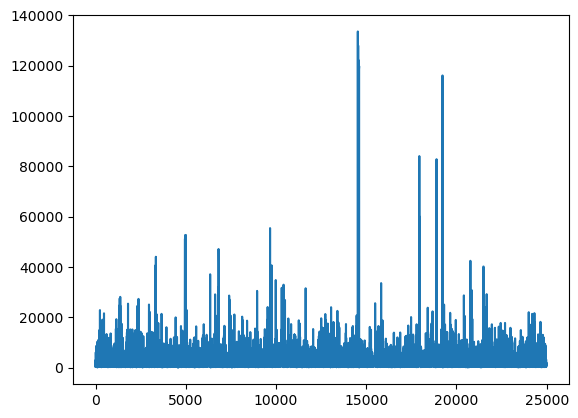

In [31]:
#chart
df['length'].plot()
df

,case_id,case_outcome,case_title,case_text,length
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428.0
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974.0
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428.0
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974.0
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701.0
...,...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...,926.0
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...,426.0
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...,426.0
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...,1163.0


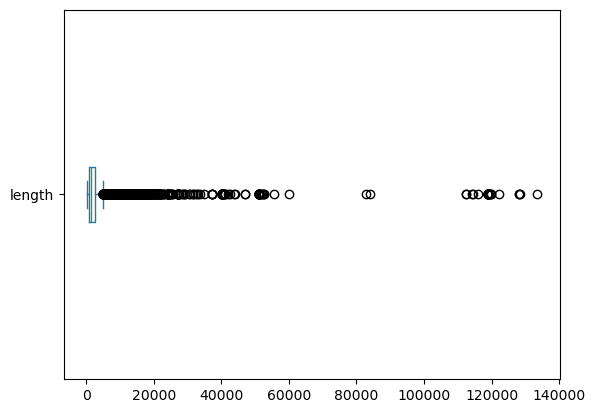

In [32]:
#Boxplot 
df['length'].plot(kind='box', vert=False)
df

,case_id,case_outcome,case_title,case_text,length
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428.0
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974.0
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428.0
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974.0
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701.0
...,...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...,926.0
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...,426.0
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...,426.0
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...,1163.0


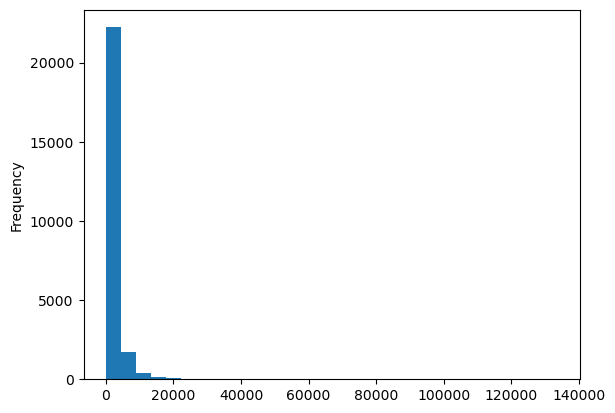

In [33]:
#Histogram
df['length'].plot(kind='hist', bins=30)
df

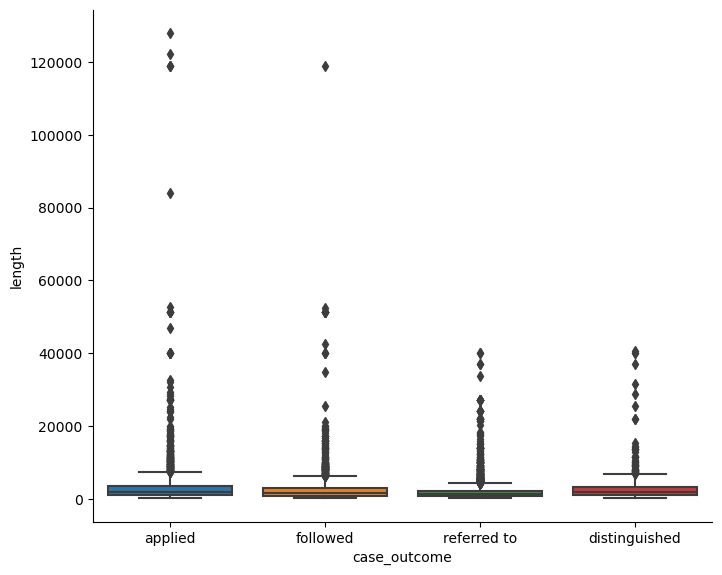

In [34]:
#bar plot
import seaborn as sns
where = df['case_outcome'].isin(['citied', 'applied', 'distinguished', 'referred to', 'followed'])
g = sns.catplot(data=df[where], x="case_outcome", y="length", kind='box')
g.fig.set_size_inches(8, 6) ###

#QUESTION 3

In [116]:
import regex as re

def tokenize(text):
    # Using regular expression to find all word tokens in the text
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r':', '', text) # Remove :
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [73]:
# We will use the list of English stop words that are standard in python
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"needn't", 'yours', 'yourself', 'them', "she's", 'your', 'below', 'off', 'didn', 'mightn', "hasn't", "it's", 'same', 'an', "mightn't", 'over', 'not', 'shan', 'such', 'before', "haven't", "should've", 'other', 'herself', 'hers', 'wouldn', 'with', 'couldn', 'themselves', 'when', 'ours', "weren't", 'her', 'needn', 'these', 'if', 'out', 'am', 'further', 'whom', 'we', 'where', 't', 'yourselves', 'after', 'his', "wouldn't", "couldn't", 'having', "you're", 'ourselves', 'my', 'himself', 'most', 'through', "didn't", 'does', 'itself', 'again', 'can', 'then', 'so', 'doesn', "mustn't", 'its', "you'll", 'who', 'myself', 'of', 'all', 'no', 'haven', 'hasn', 'very', 'both', 'for', 'because', 'or', 'from', 'what', "won't", 'down', 'ma', 'into', 'own', 'll', 've', 'as', 'are', "hadn't", 'mustn', 'in', 'but', 'you', 'will', 'did', 'him', "you've", 's', 'ain', "aren't", 'between', 'theirs', 'were', 'now', 'being', 'isn', 'y', 'nor', 'i', 're', 'has', "wasn't", 'won', 'during', 'wasn', 'me', 'it', 'to', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
# Making a Pipeline
pipeline = [str.lower, tokenize, remove_stop]
def prepare(case_text, pipeline):
    tokens = case_text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [75]:
# Counting the number of tokens using length method
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,case_id,case_outcome,case_title,case_text,length,tokens,num_tokens
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...,926.0,"[reches, pty, ltd, v, tadiran, pty, ltd, fcr]",8
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...,426.0,"[sir, lindsay, parkinson, amp, co, ltd, v, tri...",10
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...,426.0,"[spiel, v, commodity, brokers, australia, pty,...",9
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...,1163.0,"[tullock, ltd, v, walker, unreported, supreme,...",13
24984,Case25207,distinguished,Yandil Holdings Pty Ltd v Insurance Co of Nort...,"In my view, it is clear that the Court may do ...",1737.0,"[yandil, holdings, pty, ltd, v, insurance, co,...",10


In [76]:
# Counting the most common 5 tokens using map() method
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('v', 23467), ('ltd', 11793), ('pty', 8375), ('hca', 6021), ('fca', 5963)]


In [77]:
# put the word frequency in it’s own dataframe for analysis
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [78]:
# Sorting and Displaying 10 values of the frequency dataframe
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
v,23467
ltd,11793
pty,8375
hca,6021
fca,5963
clr,5621
fcr,4415
minister,4273
immigration,3902


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

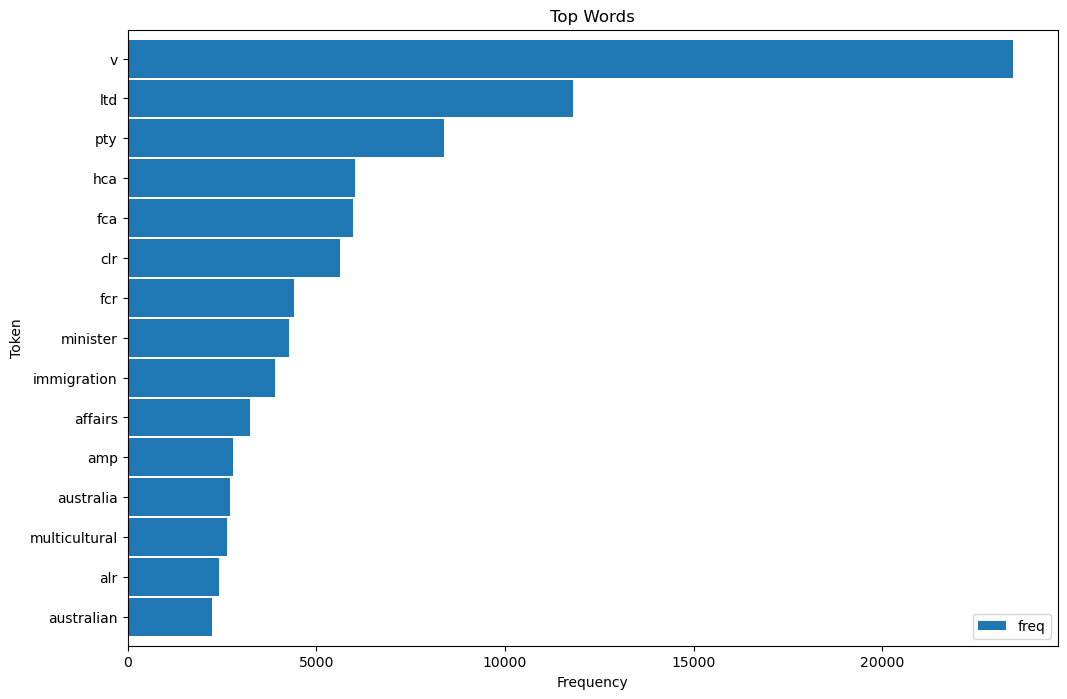

In [79]:
# plotting top 15 frequency dataframe names in the Y-axis named Token
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()

ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [81]:
!pip install WordCloud

(-0.5, 399.5, 199.5, -0.5)

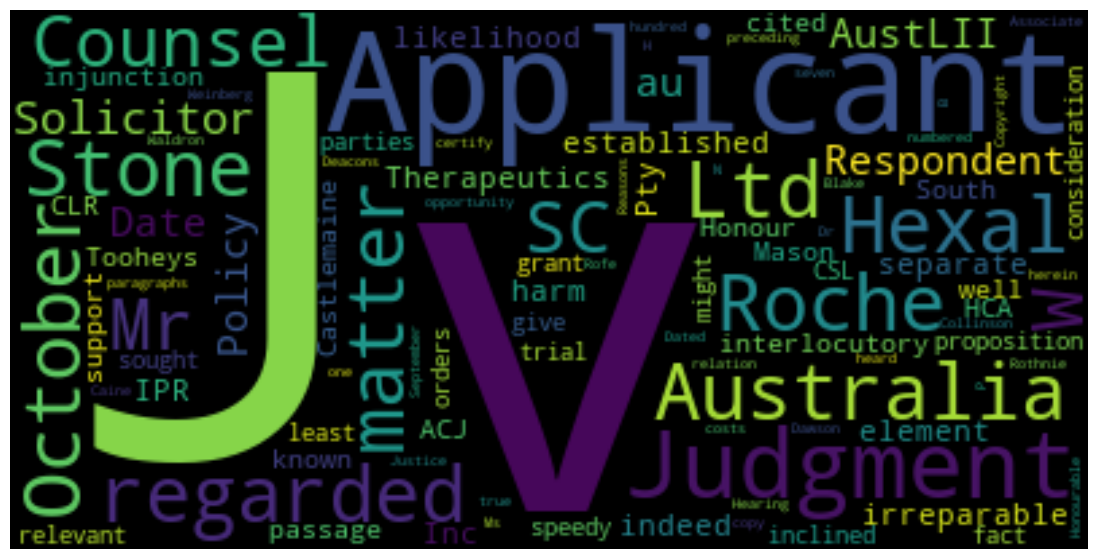

In [82]:
# Importing libraries wordcloud and matplotlib
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Printing output with the needy requirements
text = df.query("case_outcome=='followed'")['case_text'].values[0]
plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

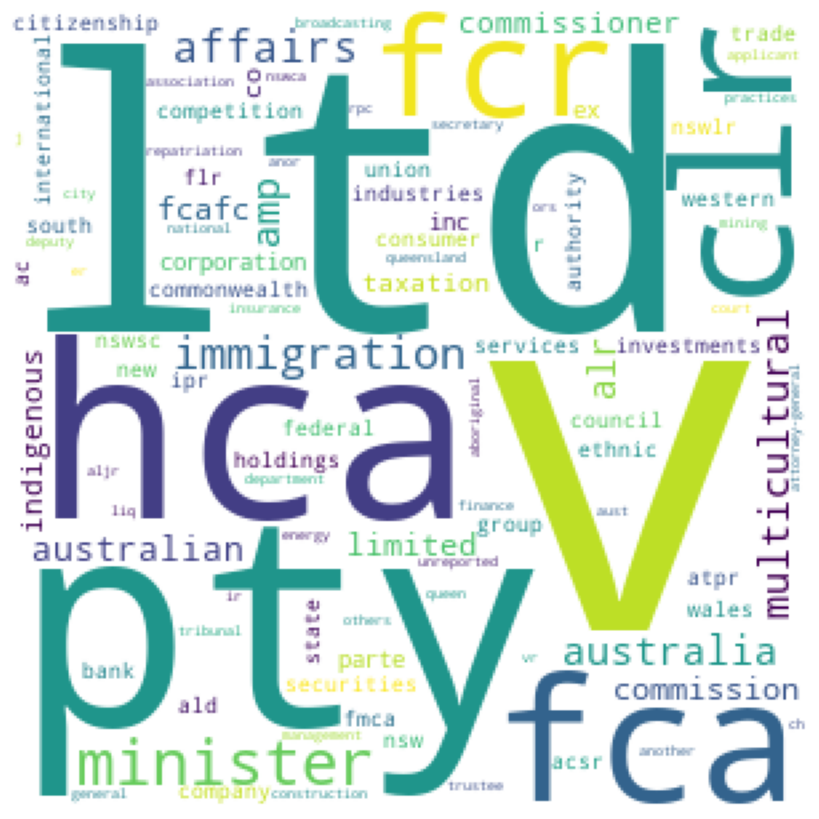

In [83]:
# Printing output with the needy requirements
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## REGEX

In [106]:
#Question 4
import re

# Creating Patterns
username_pattern = r'\b[A-Za-z0-9_]{3,16}\b'
password_pattern = r'\b[A-Za-z0-9!@#$%^&*()_+=-]{8,32}\b'
date_pattern = r'\b\d{1,2}/\d{1,2}/\d{4}\b'
credit_card_pattern = r'\b\d{4}[-.]?\d{4}[-.]?\d{4}[-.]?\d{4}\b'
ssn_pattern = r'\b\d{3}-\d{2}-\d{4}\b'

def match_patterns(text):
    usernames = re.findall(username_pattern, text)
    passwords = re.findall(password_pattern, text)
    dates = re.findall(date_pattern, text)
    credit_cards = re.findall(credit_card_pattern, text)
    ssns = re.findall(ssn_pattern, text)

    return {
        'usernames': usernames,
        'passwords': passwords,
        'dates': dates,
        'credit_cards': credit_cards,
        'ssns': ssns
    }



In [113]:
# Example strings
username_example = "sowkyakammampati121@gmail.com"
password_example = "Mummyily@123"
date_example = "09/11/2021"
credit_card_example = "1234-1567-2345-3457"
ssn_example = "123-45-6789."
url_example = "www.https:github.com"


In [115]:
# Extracting and printing matches
result = match_patterns(text)
print("Username:", re.findall(username_pattern, username_example))
print("Password:", re.findall(password_pattern, password_example))
print("Date:", re.findall(date_pattern, date_example))
print("Credit Card:", re.findall(credit_card_pattern, credit_card_example))
print("SSN Example:", re.findall(ssn_pattern, ssn_example))


Username: ['gmail', 'com']
Password: ['Mummyily@123']
Date: ['09/11/2021']
Credit Card: ['1234-1567-2345-3457']
SSN Example: ['123-45-6789']


## 5. Sentiment analysis

In [85]:
# Importing the 'regex' module as 're' for regular expression operations
import regex as re
# Defining a function called 'tokenize' that takes a text input
def tokenize(text):
    # Using regular expression to find all word tokens in the text
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [86]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --- ----------------------------------- 61.4/626.3 kB 825.8 kB/s eta 0:00:01
   ----------------------------- ---------- 460.8/626.3 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.4 MB/s eta 0:00:00


In [87]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [90]:
#Create a function to get the subjectivity
def getSubjectivity(case_title):
    return TextBlob(case_title).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(case_title):
    return TextBlob(case_title).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['case_title'].apply(getSubjectivity)
df['Polarity'] = df['case_title'].apply(getPolarity)

#Now display data
df.head()

,case_id,case_outcome,case_title,case_text,length,tokens,num_tokens,Subjectivity,Polarity
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428.0,"[alpine, hardwood, aust, pty, ltd, v, hardys, ...",11,0.000000,0.000000
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974.0,"[black, v, lipovac, fca, alr]",5,0.433333,-0.166667
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428.0,"[colgate, palmolive, co, v, cussons, pty, ltd,...",8,0.000000,0.000000
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974.0,"[dais, studio, pty, ltd, v, bullett, creative,...",10,1.000000,0.500000
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701.0,"[dr, martens, australia, pty, ltd, v, figgins,...",11,0.000000,0.000000


In [91]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

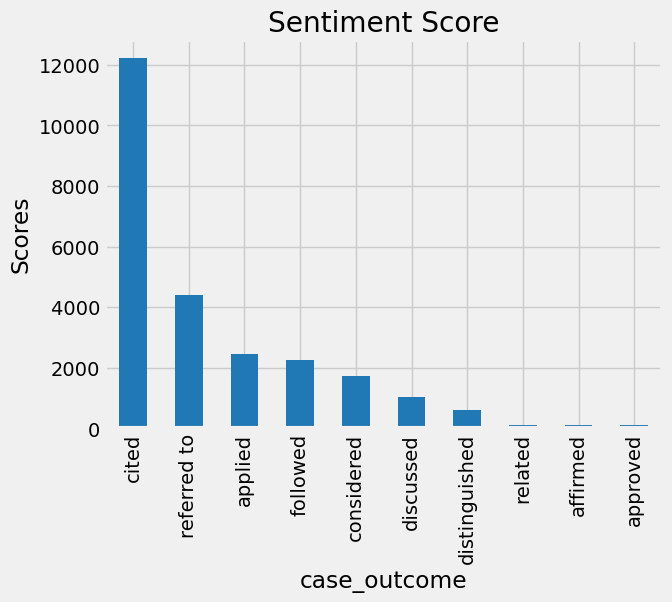

In [92]:
#Plot the values count of sentiment
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
df["Insight"] = df["Polarity"].apply(getInsight)
plt.title("Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["case_outcome"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()